# Homework 1

Name: Tomoki Kyotani

NUID: ‭002986248‬

In [1]:
# Install libraries
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

%matplotlib inline

1. Generate a normal distribution (mean = 7, standard deviation = 2) , for three different sample sizes 100,1000,100,000. Design a python class to get the following items:

In [2]:
class NormalDistribution():
    def __init__(self, data_range, mu, sigma2):
        """Initialize normal distribution.

        Parameters
        ----------
        data_range: List of data points based on the data range and sample size 
        mu: mean
        sigma2: variance (= standard_deviation ^2)
        """
        self.data_range = data_range
        self.mu = mu
        self.sigma2 = sigma2
        self.pdf = 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(data_range - mu)**2 / (2 * sigma2))

    def plot_pdf(self):
        """Plot density function.

        Parameters
        ----------
        None
        """
        plt.plot(self.data_range, self.pdf, label="sample size = {}".format(len(self.data_range)))

a) Show the density curve for all the three sample sizes (5 points)

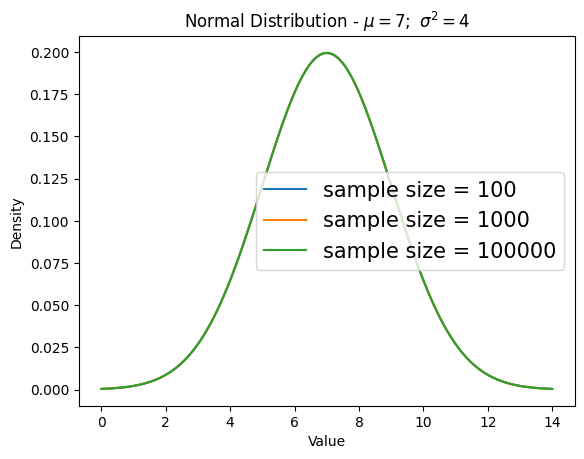

In [3]:
range_start = 0
range_end = 14
mu = 7
variance = np.square(2)

nd_100 = NormalDistribution(np.linspace(range_start, range_end, 100), mu, variance)
nd_1000 = NormalDistribution(np.linspace(range_start, range_end, 1000), mu, variance)
nd_100000 = NormalDistribution(np.linspace(range_start, range_end, 100000), mu, variance)

nd_100.plot_pdf()
nd_1000.plot_pdf()
nd_100000.plot_pdf()
plt.title(r"Normal Distribution - $\mu={}; \ \sigma^2={}$".format(mu, variance))
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(fontsize=15);

b) Explain the findings for all three samples (5 points)

At this granularity of the plots, all of the graphs for normal distributions overlap with each other and seem to have the same shape.

However, as shown below, if I change the sample data size to 5, 10, and 100, I can see that the larger the sample size is, the closer the graph is to the perfect bell curve shape.

Therefore, when building a machine learning model with normal distribution datasets, we should use larger size datasets to get better results.

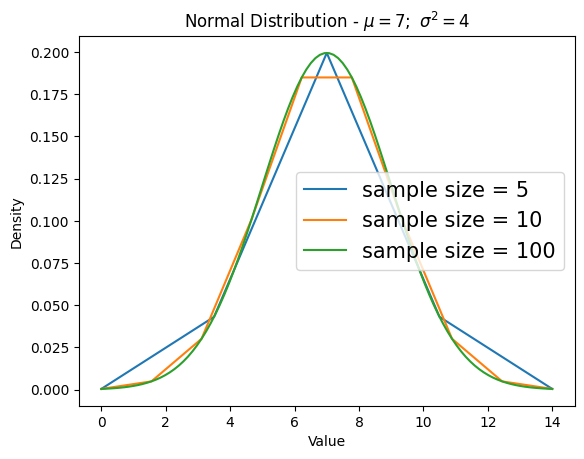

In [4]:
range_start = 0
range_end = 14
mu = 7
variance = np.square(2)

nd_5 = NormalDistribution(np.linspace(range_start, range_end, 5), mu, variance)
nd_10 = NormalDistribution(np.linspace(range_start, range_end, 10), mu, variance)
nd_100 = NormalDistribution(np.linspace(range_start, range_end, 100), mu, variance)

nd_5.plot_pdf()
nd_10.plot_pdf()
nd_100.plot_pdf()
plt.title(r"Normal Distribution - $\mu={}; \ \sigma^2={}$".format(mu, variance))
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(fontsize=15);

c) Convert the simulated data into a standard normal distribution, and plot for all three different sample sizes. (5 points)

A standard normal distribution is a normal distibution where mean = 0 and standard deviation = 1.

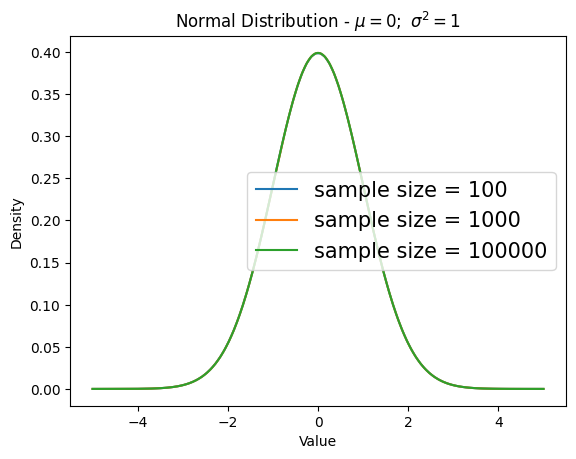

In [5]:
range_start = -5
range_end = 5
mu = 0
variance = np.square(1)

nd_100 = NormalDistribution(np.linspace(range_start, range_end, 100), mu, variance)
nd_1000 = NormalDistribution(np.linspace(range_start, range_end, 1000), mu, variance)
nd_100000 = NormalDistribution(np.linspace(range_start, range_end, 100000), mu, variance)

nd_100.plot_pdf()
nd_1000.plot_pdf()
nd_100000.plot_pdf()
plt.title(r"Normal Distribution - $\mu={}; \ \sigma^2={}$".format(mu, variance))
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(fontsize=15);

2. Generate a standard normal distribution for three different sample sizes 100, 5000, 50,000. Design a python class to get the following items:

In [6]:
class StandardNormalDistribution():
    def __init__(self, data_range):
        """Initialize standard normal distribution.

        Parameters
        ----------
        data_range: List of data points based on the data range and sample size 
        """
        self.data_range = data_range
        self.pdf = 1 / np.sqrt(2 * np.pi) * np.exp(-data_range**2 / 2)

    def plot_pdf(self):
        """Plot density function.

        Parameters
        ----------
        None
        """
        plt.plot(self.data_range, self.pdf, label="sample size = {}".format(len(self.data_range)))

a) Show the density curve for all the three sample sizes (5 points)

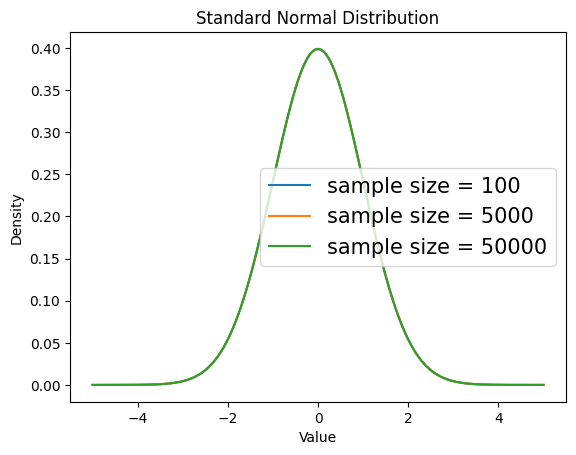

In [7]:
range_start = -5
range_end = 5

snd_100 = StandardNormalDistribution(np.linspace(range_start, range_end, 100))
snd_5000 = StandardNormalDistribution(np.linspace(range_start, range_end, 5000))
snd_50000 = StandardNormalDistribution(np.linspace(range_start, range_end, 50000))

snd_100.plot_pdf()
snd_5000.plot_pdf()
snd_50000.plot_pdf()
plt.title("Standard Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(fontsize=15);

b) Explain the findings for all three samples (5 points)

Again, at this granularity of the plots, all of the graphs for standard normal distributions overlap with each other and seem to have the same shape.

However, as shown below, if I change the sample data size to 5, 10, and 100, I can see that the larger the sample size is, the closer the graph is to the perfect bell curve shape.

Therefore, when building a machine learning model with standard normal distribution datasets, we should use larger size datasets to get better results.

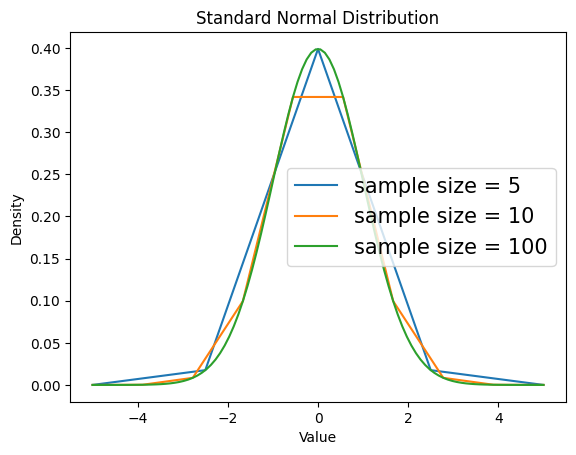

In [8]:
range_start = -5
range_end = 5

snd_5 = StandardNormalDistribution(np.linspace(range_start, range_end, 5))
snd_10 = StandardNormalDistribution(np.linspace(range_start, range_end, 10))
snd_100 = StandardNormalDistribution(np.linspace(range_start, range_end, 100))

snd_5.plot_pdf()
snd_10.plot_pdf()
snd_100.plot_pdf()
plt.title("Standard Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(fontsize=15)

3. Binomial Distribution simulation. Generate a random number between 0 and 1. If that number is 0.5 or more, then event it as fake. Otherwise not a fake for 500, 5000, and 500,000 trails. 

Design a python class to get the following items:

a) Show the density curve for all the three sample sizes (5 points)

The formula to calculate the probability mass function can be found here: https://en.wikipedia.org/wiki/Binomial_distribution

In [10]:
class BinomialDistribution():
    def __init__(self, sample_data):
        """Initialize binomial distribution.

        Parameters
        ----------
        sample_data: List of data points - 1...fake, 0...not fake
        """
        self.sample_data = sample_data
        
        # Calculate the probability of fake (1) in the dataset
        self.prob_fake = np.sum(self.sample_data) / len(self.sample_data)
        
        # Range from 0 to the size of the dataset to calculate the pmf
        self.sample_range = np.arange(0, len(self.sample_data)+1, 1)

    def plot_probabilities(self):
        """Plot probabilities of fake and not fake in the dataset.

        Parameters
        ----------
        None
        """
        plt.scatter([0,1], [1-self.prob_fake, self.prob_fake], label="sample size = {}".format(len(self.sample_data)))

    def plot_pmf(self):
        """Plot probability mass function.

        Parameters
        ----------
        None
        """
        plt.plot(self.sample_range, self.pmf, label="sample size = {}".format(len(self.sample_data)))
    
    def calculate_pmf(self):
        """Calculate the probability mass function for each possible occurance of fake.

        Parameters
        ----------
        None
        """
        num_sample = len(self.sample_data)
        
        self.pmf = [ Decimal( np.math.factorial(num_sample)//( np.math.factorial(num_success)*np.math.factorial(num_sample-num_success) ) ) * Decimal(self.prob_fake)**num_success * Decimal(1-self.prob_fake)**(num_sample-num_success) for num_success in self.sample_range ]
        

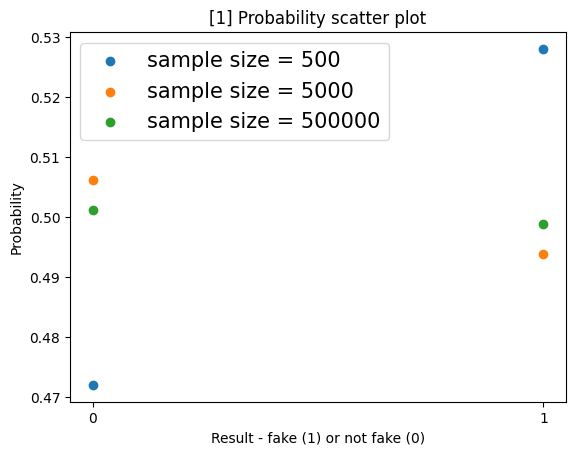

In [14]:
sample = np.random.random_sample(500)
sample_labeled = [1 if n >= 0.5 else 0 for n in sample]
bd_500 = BinomialDistribution(sample_labeled)

sample = np.random.random_sample(5000)
sample_labeled = [1 if n >= 0.5 else 0 for n in sample]
bd_5000 = BinomialDistribution(sample_labeled)

sample = np.random.random_sample(500000)
sample_labeled = [1 if n >= 0.5 else 0 for n in sample]
bd_500000 = BinomialDistribution(sample_labeled)

bd_500.plot_probabilities()
bd_5000.plot_probabilities()
bd_500000.plot_probabilities()

plt.title("[1] Probability scatter plot")
plt.xlabel("Result - fake (1) or not fake (0)")
plt.ylabel("Probability")
plt.legend(fontsize=15)

x_labels = [0, 1]
plt.xticks(ticks=x_labels, labels=x_labels);

The scatter plots above show the probabilities of getting fake (1) or not fake (0) in each sample dataset.

The below class/codes plot the probability mass function of these Binomial Distributions. The calculation with the sample data size 500,000 was taking more than 6 hours, and I was not able to complete this time-consuming calculation. Therefore, I chose the sample size of 10,000 instead of 500,000.

In [15]:
bd_500.calculate_pmf()
bd_5000.calculate_pmf()

In [ ]:
# This computation (sample size 500,000) was taking more than 6 hours and could not be completed.
bd_500000.calculate_pmf()

In [16]:
sample = np.random.random_sample(10000)
sample_labeled = [1 if n >= 0.5 else 0 for n in sample]
bd_10000 = BinomialDistribution(sample_labeled)
bd_10000.calculate_pmf()

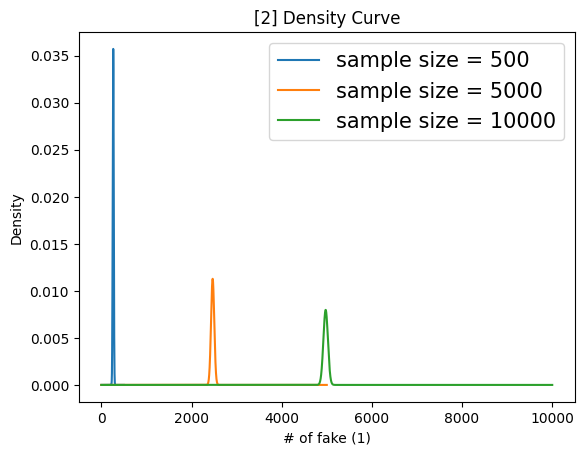

In [17]:
bd_500.plot_pmf()
bd_5000.plot_pmf()
#bd_500000.plot_pmf()
bd_10000.plot_pmf()

plt.title("[2] Density Curve")
plt.xlabel("# of fake (1)")
plt.ylabel("Density")
plt.legend(fontsize=15);

b) Explain the findings for all three samples (5 points)

Looking at the plots "[1] Probability scatter plot", the probability of getting fake or not fake is within +-0.03 from 0.5 for all of the datasets. Among these three datasets (500, 5000, 500000), the larger the dataset size is, the closer the probability of getting fake is to 0.5.

Regarding the plots "[2] Density Curve", we can see that the number of fake results we most likely get is around the half of the dataset size (250 for dataset size 500, 2500 for dataset size 5000, and 5000 for dataset size 10000).